## Clustering

*Prepared by:*
**Jude Michael Teves**  

In this notebook, we will learn how to perform clustering.

## Preliminaries

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

sns.set_style('darkgrid')

# sns.set_palette('Set2')
# sns.color_palette('Set2')

C:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Load Dataset

We will be using the Wholesale customers data. This dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories.

This dataset has the following features:

1. FRESH: annual spending (m.u.) on fresh products (Continuous);
2. MILK: annual spending (m.u.) on milk products (Continuous);
3. GROCERY: annual spending (m.u.)on grocery products (Continuous);
4. FROZEN: annual spending (m.u.)on frozen products (Continuous)
5. DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
6. DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
7. CHANNEL: customers' Channel - Horeca (Hotel/Restaurant/Cafe) or Retail channel (Nominal)
8. REGION: customers' Region - Lisnon, Oporto or Other (Nominal)


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Cyntwikip/data-repository/main/wholesale%20customers%20data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


## Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
df['Channel'].value_counts()

1    298
2    142
Name: Channel, dtype: int64

In [6]:
df['Region'].value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

## Preprocessing

### Encoding

In [7]:
one_hot = pd.get_dummies(df['Region'], prefix='Region')
df_encoded = df.drop('Region', axis=1)
df_encoded = df_encoded.join(one_hot)
df_encoded

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_1,Region_2,Region_3
0,2,12669,9656,7561,214,2674,1338,0,0,1
1,2,7057,9810,9568,1762,3293,1776,0,0,1
2,2,6353,8808,7684,2405,3516,7844,0,0,1
3,1,13265,1196,4221,6404,507,1788,0,0,1
4,2,22615,5410,7198,3915,1777,5185,0,0,1
...,...,...,...,...,...,...,...,...,...,...
435,1,29703,12051,16027,13135,182,2204,0,0,1
436,1,39228,1431,764,4510,93,2346,0,0,1
437,2,14531,15488,30243,437,14841,1867,0,0,1
438,1,10290,1981,2232,1038,168,2125,0,0,1


### Feature Scaling

In [8]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
# scaler = StandardScaler()
scaled_vals = scaler.fit_transform(df_encoded)
df_scaled = pd.DataFrame(scaled_vals, columns=df_encoded.columns)
df_scaled

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_1,Region_2,Region_3
0,1.0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847,0.0,0.0,1.0
1,1.0,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984,0.0,0.0,1.0
2,1.0,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559,0.0,0.0,1.0
3,0.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234,0.0,0.0,1.0
4,1.0,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
435,0.0,0.264829,0.163338,0.172715,0.215469,0.004385,0.045912,0.0,0.0,1.0
436,0.0,0.349761,0.018736,0.008202,0.073713,0.002205,0.048874,0.0,0.0,1.0
437,1.0,0.129543,0.210136,0.325943,0.006771,0.363463,0.038882,0.0,0.0,1.0
438,0.0,0.091727,0.026224,0.024025,0.016649,0.004042,0.044264,0.0,0.0,1.0


In [9]:
df_scaled.describe()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_1,Region_2,Region_3
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.0000,440.000000,440.000000
mean,0.322727,0.106977,0.078173,0.085671,0.050078,0.070510,0.031745,0.1750,0.106818,0.718182
std,0.468052,0.112774,0.100491,0.102430,0.079789,0.116790,0.058826,0.3804,0.309234,0.450397
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
25%,0.000000,0.027863,0.020124,0.023174,0.011788,0.006216,0.008453,0.0000,0.000000,0.000000
50%,0.000000,0.075802,0.048636,0.051225,0.024670,0.019927,0.020077,0.0000,0.000000,1.000000
75%,1.000000,0.150968,0.097154,0.114821,0.058005,0.095997,0.037907,0.0000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000


## Clustering

In [10]:
from sklearn.cluster import KMeans

### Choosing optimal number of clusters

In [13]:
sum_of_squared_errors = []

k_list = range(1, 15)
for k in k_list:
    km = KMeans(n_clusters=k, random_state=42)
    km = km.fit(df_scaled)
    sum_of_squared_errors.append(km.inertia_)

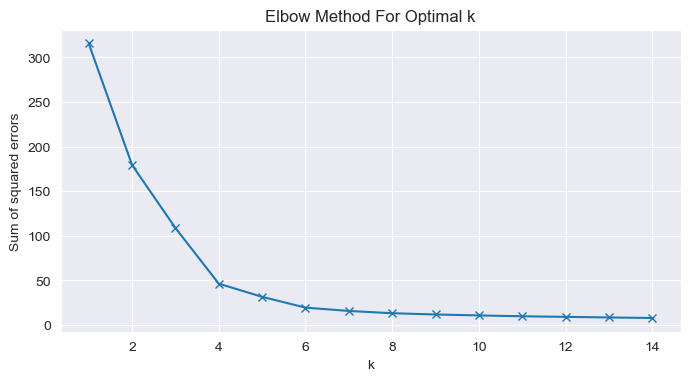

In [15]:
fig, ax = plt.subplots(1,1, figsize=(8,4), dpi=100)
plt.plot(k_list, sum_of_squared_errors, 'x-')
plt.xlabel('k')
plt.ylabel('Sum of squared errors')
plt.title('Elbow Method For Optimal k')
plt.show()

**The elbow occured at k=4, so let's choose that!**

### Assigning cluster labels

In [22]:
# Cluster using K-means
k = 4
km = KMeans(n_clusters=k, random_state=42)
km.fit(df_scaled)
labels = km.predict(df_scaled)

# Create new dataframe with features and labels
df_labeled = df_encoded.copy() # note that I used the unscaled data
df_labeled['cluster'] = labels

df_labeled

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_1,Region_2,Region_3,cluster
0,2,12669,9656,7561,214,2674,1338,0,0,1,0
1,2,7057,9810,9568,1762,3293,1776,0,0,1,0
2,2,6353,8808,7684,2405,3516,7844,0,0,1,0
3,1,13265,1196,4221,6404,507,1788,0,0,1,1
4,2,22615,5410,7198,3915,1777,5185,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
435,1,29703,12051,16027,13135,182,2204,0,0,1,1
436,1,39228,1431,764,4510,93,2346,0,0,1,1
437,2,14531,15488,30243,437,14841,1867,0,0,1,0
438,1,10290,1981,2232,1038,168,2125,0,0,1,1


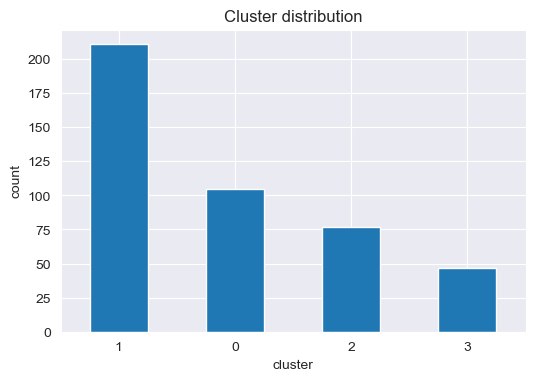

In [36]:
fig, ax = plt.subplots(1,1, figsize=(6,4), dpi=100)
df_labeled['cluster'].value_counts().plot(kind='bar', ax=ax)
plt.xticks(rotation=0)
plt.ylabel('count')
plt.xlabel('cluster')
plt.title('Cluster distribution')
plt.show()

### Interpreting our clusters

In [24]:
k = 4

for i in range(k):
    print(f'Cluster {i}')
    display(df_labeled[df_labeled['cluster']==i].describe())

Cluster 0


,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_1,Region_2,Region_3,cluster
count,105.0,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.0,105.0,105.0,105.0
mean,2.0,9831.504762,10981.009524,15953.809524,1513.200000,6899.238095,1826.209524,0.0,0.0,1.0,0.0
std,0.0,9635.394129,10574.827178,12298.935356,1504.498737,6022.091110,2119.052222,0.0,0.0,0.0,0.0
min,2.0,23.000000,1124.000000,4523.000000,33.000000,523.000000,3.000000,0.0,0.0,1.0,0.0
25%,2.0,2343.000000,6128.000000,9170.000000,437.000000,3537.000000,545.000000,0.0,0.0,1.0,0.0
50%,2.0,7362.000000,7845.000000,12121.000000,1059.000000,5121.000000,1386.000000,0.0,0.0,1.0,0.0
75%,2.0,15076.000000,11114.000000,19805.000000,2194.000000,7677.000000,2158.000000,0.0,0.0,1.0,0.0
max,2.0,44466.000000,73498.000000,92780.000000,8132.000000,40827.000000,16523.000000,0.0,0.0,1.0,0.0


Cluster 1


,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_1,Region_2,Region_3,cluster
count,211.0,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.0,211.0,211.0,211.0
mean,1.0,13878.052133,3486.981043,3886.734597,3656.900474,786.682464,1518.284360,0.0,0.0,1.0,1.0
std,0.0,14746.572913,4508.505269,3593.506056,4956.590848,1099.970640,3663.183304,0.0,0.0,0.0,0.0
min,1.0,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,0.0,0.0,1.0,1.0
25%,1.0,3702.500000,1188.500000,1666.000000,779.000000,176.500000,378.500000,0.0,0.0,1.0,1.0
50%,1.0,9612.000000,2247.000000,2642.000000,1960.000000,375.000000,823.000000,0.0,0.0,1.0,1.0
75%,1.0,18821.000000,4205.000000,4927.500000,4542.500000,948.500000,1582.000000,0.0,0.0,1.0,1.0
max,1.0,112151.000000,43950.000000,21042.000000,36534.000000,6907.000000,47943.000000,0.0,0.0,1.0,1.0


Cluster 2


,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_1,Region_2,Region_3,cluster
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.0,77.0,77.0,77.0
mean,1.233766,11101.727273,5486.415584,7403.077922,3000.337662,2651.116883,1354.896104,1.0,0.0,0.0,2.0
std,0.426000,11557.438575,5704.856079,8496.287728,3092.143894,4208.462708,1345.423340,0.0,0.0,0.0,0.0
min,1.000000,18.000000,258.000000,489.000000,61.000000,5.000000,7.000000,1.0,0.0,0.0,2.0
25%,1.000000,2806.000000,1372.000000,2046.000000,950.000000,284.000000,548.000000,1.0,0.0,0.0,2.0
50%,1.000000,7363.000000,3748.000000,3838.000000,1801.000000,737.000000,806.000000,1.0,0.0,0.0,2.0
75%,1.000000,15218.000000,7503.000000,9490.000000,4324.000000,3593.000000,1775.000000,1.0,0.0,0.0,2.0
max,2.000000,56083.000000,28326.000000,39694.000000,18711.000000,19410.000000,6854.000000,1.0,0.0,0.0,2.0


Cluster 3


,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_1,Region_2,Region_3,cluster
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.0,47.0,47.0,47.0
mean,1.404255,9887.680851,5088.170213,9218.595745,4045.361702,3687.468085,1159.702128,0.0,1.0,0.0,3.0
std,0.496053,8387.899211,5826.343145,10842.745314,9151.784954,6514.717668,1050.739841,0.0,0.0,0.0,0.0
min,1.000000,3.000000,333.000000,1330.000000,131.000000,15.000000,51.000000,0.0,1.0,0.0,3.0
25%,1.000000,2751.500000,1430.500000,2792.500000,811.500000,282.500000,540.500000,0.0,1.0,0.0,3.0
50%,1.000000,8090.000000,2374.000000,6114.000000,1455.000000,811.000000,898.000000,0.0,1.0,0.0,3.0
75%,2.000000,14925.500000,5772.500000,11758.500000,3272.000000,4324.500000,1538.500000,0.0,1.0,0.0,3.0
max,2.000000,32717.000000,25071.000000,67298.000000,60869.000000,38102.000000,5609.000000,0.0,1.0,0.0,3.0


### Grouping based on region

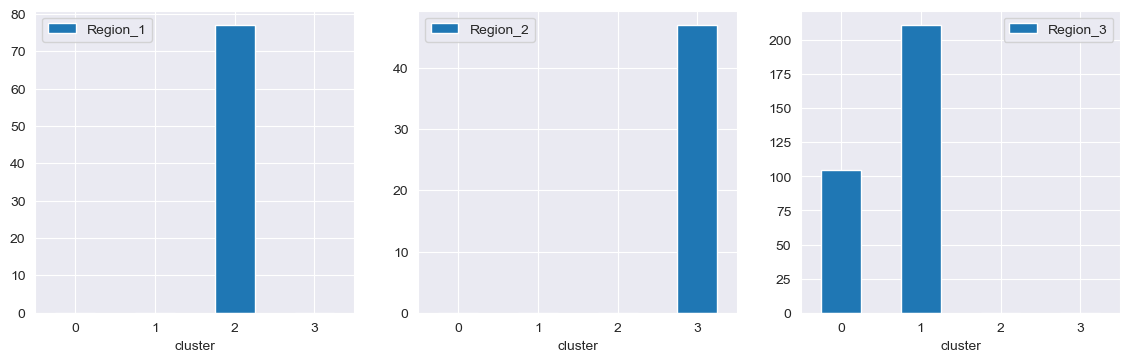

In [58]:
fig, ax = plt.subplots(1,3, figsize=(14,4), dpi=100)

for index, feature in enumerate(['Region_1', 'Region_2', 'Region_3']):
    grouped = df_labeled[[feature,'cluster']].groupby('cluster').sum()
    grouped.plot(kind='bar', ax=ax[index])
    ax[index].set_xticklabels(grouped.index.tolist(), rotation=0)
plt.show()

We can see that clusters were primarily done based on region. Only clusters 0 and 1 share the same cluster.

### Grouping based on Channel

In [72]:
df_labeled.query('cluster==0')['Channel'].value_counts()

2    105
Name: Channel, dtype: int64

In [73]:
df_labeled.query('cluster==1')['Channel'].value_counts()

1    211
Name: Channel, dtype: int64

We can see that Clusters 0 and 1 are clearly separable if we use the `Channel` feature.

### Recommendations

What if we remove region and channel features? What will be our clusters?

## References

1. https://archive.ics.uci.edu/ml/datasets/wholesale+customers

## End
<sup>made by **Jude Michael Teves**</sup> <br>
<sup>for comments, corrections, suggestions, please email:</sup><sup> <href>judemichaelteves@gmail.com</href> or <href>jude.teves@dlsu.edu.ph</href></sup><br>